# BootCamp 2019 - Week 1

## Numerical Integration

Author: Martina Fraschini

In [1]:
# import packages
import numpy as np
from matplotlib import pyplot as plt

### Problem 2.1

In [2]:
# define the function
def integrate(g, a, b, N, method):
    if method == 'midpoint':
        x = np.linspace(a,b,N)
        return ((b-a)/N) * sum(g(x))
    elif method == 'trapezoid':
        x = np.linspace(a,b,N)
        return ((b-a)/(2*N)) * (g(x[0]) + g(x[-1]) + 2*sum(g(x[1:-1])))
    elif method == 'Simpsons':
        x = np.linspace(a,b,2*N)
        return ((b-a)/(6*N)) * (g(x[0]) + g(x[-1]) + 4*sum(g(x[1:-2:2])) + 2*sum(g(x[2:-1:2])))
    else:
        print("Invalid method. Please, try again.")
        return
    
# demo for function
g = lambda x: .1*x**4 - 1.5*x**3 + .53*x**2 + 2*x + 1
a = -10
b = 10
N = 100
rightinteg = 4373.3333
methods = {'midpoint', 'trapezoid', 'Simpsons'}

# comparison
print("Integrating the function with N =", N, ":")
for met in methods:
    integ = integrate(g, a, b, N, met)
    print("- the error of method", met, "is", abs(rightinteg-integ))

Integrating the function with N = 100 :
- the error of method trapezoid is 40.96842676676806
- the error of method midpoint is 169.8315732332312
- the error of method Simpsons is 7.729273977781304


### Problem 2.2

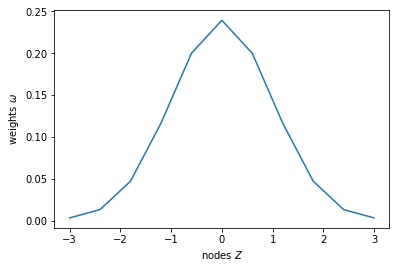

In [3]:
# import package
from scipy.stats import norm
import sys
# define function
def normal_distr(mu, sigma, N, k):
    Z = np.linspace(mu-k,mu+k,N)
    w = np.zeros_like(Z)
    w[0] = norm(mu,sigma).cdf((Z[0]+Z[1])/2)
    w[-1] = 1 - norm(mu,sigma).cdf((Z[-2]+Z[-1])/2)
    for i in range(1,N-1):
        a = (Z[i-1] + Z[i]) / 2
        b = (Z[i] + Z[i+1]) / 2
        w[i] = (b-a) * norm(mu,sigma).pdf(Z[i])
    return Z, w

myZ, myw = normal_distr(0, 1, 11, 3)
plt.plot(myZ,myw)
plt.xlabel("nodes "+r"$Z$")
plt.ylabel("weights "+r"$\omega$")
plt.show()

### Problem 2.3

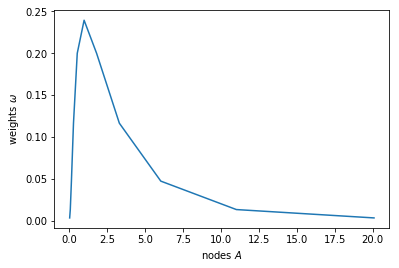

In [4]:
# def function (I don't redefine the function normal_distr)
def lognormal_distr(mu, sigma, N, k):
    Z, w = normal_distr(mu, sigma, N, k)
    return np.exp(Z), w

myA, myw = lognormal_distr(0, 1, 11, 3)

plt.plot(myA,myw)
plt.xlabel("nodes "+r"$A$")
plt.ylabel("weights "+r"$\omega$")
plt.show()

### Problem 2.4

In [5]:
# I don't redefine the funcions normal_distr and lognormal_distr
mymu = 10.5
mysigma = .8
N = 11

myA, myw = lognormal_distr(mymu, mysigma, N, 3)

# approximated expected value
average = sum(myA*myw)/sum(myw)
print("The approximated expected value is", round(average,2))
print("The exact expected value is", round(np.exp(10.5+(0.8**2)/2),2))

The approximated expected value is 50061.64
The exact expected value is 50011.09


### Problem 3.1

In [6]:
# import package
import scipy

# define functions
def gausseq(x):
    a = - 10
    b = 10
    return [x[3] + x[4] + x[5] - b + a,
            x[3]*x[0] + x[4]*x[1] + x[5]*x[2],
            x[3]*x[0]**2 + x[4]*x[1]**2 + x[5]*x[2]**2 - (b**3 - a**3)/3,
            x[3]*x[0]**3 + x[4]*x[1]**3 + x[5]*x[2]**3,
            x[3]*x[0]**4 + x[4]*x[1]**4 + x[5]*x[2]**4 - (b**5 - a**5)/5,
            x[3]*x[0]**5 + x[4]*x[1]**5 + x[5]*x[2]**5]

def gauss3_quad(g):
    sol = scipy.optimize.root(gausseq,[.5,.5,.5,.5,.5,.5])
    w = sol.x[3:]
    x = sol.x[:3]
    return sum(w * g(x))

# demo for the function
g = lambda x: .1*x**4 - 1.5*x**3 + .53*x**2 + 2*x + 1

gauss_integ = gauss3_quad(g)
print("The error of the integral approximation with the Gaussian quadrature is", abs(rightinteg-gauss_integ))

The error of the integral approximation with the Gaussian quadrature is 3.3688500479911454e-05


### Problem 3.2

In [7]:
g = lambda x: .1*x**4 - 1.5*x**3 + .53*x**2 + 2*x + 1
a = -10
b = 10

python_quad = scipy.integrate.quad(g,a,b)
print("The error of the Python function is", abs(rightinteg-python_quad[0]))

The error of the Python function is 3.333333370392211e-05


### Problem 4.1

In [8]:
# import package
import random

# define function
def mypi(N):
    random.seed(25)
    sumg = 0
    for i in range(N):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        if (x**2)+(y**2) <= 1:
            sumg += 1
    return 4.0 * sumg / N

# find the small number of draws to match pi
n = 0
while True:
    n += 1
    approxpi = mypi(n)
    if round(approxpi,4)==3.1415:
        break
        
print("The smallest number of random draws to match the true value of pi to the 4th decimal is", n)

The smallest number of random draws to match the true value of pi to the 4th decimal is 410
